# Homework 10 : Linear Regression

## Logistics

**Due date**: The homework is due 23:59 on Monday, March 25th.

You will submit your work on [MarkUs](https://markus-ds.teach.cs.toronto.edu).
To submit your work:

1. Download this file (`Homework_10.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **hw10** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)
All homeworks will take place in a Jupyter notebook (like this one). When you are done, you will download this notebook and submit it to MarkUs.

## Introduction
 In this homework we explore: 
- Preparing data from two different sources and merging before analysis
- Performing linear regression with multiple dependent variables
- Checking performance of linear regression


### Question: How do mental health visits correlated with different socioeconomic factors in men and woman 65+ living in Toronto? 

You may use the lecture notebook to help you conduct the following analysis. 

## Task 1a: Pre-processing independent variables 

#### Sociodemographic data
To perform ordinary least squares (i.e. linear regression) analysis, we will need a set of independent variables and _one_ dependent variable.

1. Read sociodemographic data from the excel file `1_socdem_neighb_2006-2.xls` with sheet name `socdem_2006` into `pandas` using `read_excel`. Name the dataframe `socdem_neighb`.
2. Select columns/variables relevant for your analysis.
3. Rename dataframe columns according to table.
4. Check first few entires of dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

#### Step 1: Read in data, name the dataframe `socdem_neighb`. Set header to row 10.

In [2]:
# Write your code here

socdem_neighb = pd.read_excel('1_socdem_neighb_2006-2.xls', sheet_name = 'socdem_2006', header = 10)

#### Step 2: Select columns and save the results to a new dataframe called `socdem_neighb_important` sconsisting of the important columns.

For our analysis, select the columns `Neighbourhood id`, `Neighbourhood Name`, `% Not in labour force *`, `% Rented Dwellings`, `% Aged 65+ living alone`.

In [3]:
# Write your code here

cols = ['Neighbourhood id', 
        'Neighbourhood Name', 
        '% Not in labour force *',
        '% Rented Dwellings',
        '% Aged 65+ living alone']

socdem_neighb_important = socdem_neighb[cols]

#### Step 3: Rename dataframe columns _inplace_ according to table below:

Old name | New name
---------|------------
`Neighbourhood id`  |`neighbid`
`Neighbourhood Name`  |`name`
`% Not in labour force *`| `pct_retired`
`% Rented Dwellings`|`pct_rent`
`% Aged 65+ living alone`|`live_alone`

In [4]:
# Write your code here

colnames = {cols[0] : 'neighbid',
            cols[1] : 'name',
            cols[2] : 'pct_retired',
            cols[3] : 'pct_rent',
            cols[4] : 'live_alone'}

socdem_neighb_important.rename(columns = colnames, inplace = True)

/var/folders/p0/ynn6kljd5pg6sh4_616yzw3c0000gn/T/ipykernel_3978/3232016011.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socdem_neighb_important.rename(columns = colnames, inplace = True)


#### Step 4: Check your dataframe by using `head()` function

In [5]:
# Write your code here

socdem_neighb_important.head()

,neighbid,name,pct_retired,pct_rent,live_alone
0,1,West Humber-Clairville,33.7,27.4,11.7
1,2,Mount Olive-Silverstone-Jamestown,34.0,52.0,15.4
2,3,Thistletown-Beaumond Heights,38.0,34.4,17.5
3,4,Rexdale-Kipling,37.0,45.1,28.8
4,5,Elms-Old Rexdale,36.5,41.2,13.0


## Task 1b: Processing dependent variable and merging dataframes

#### Mental health visit data
1) Read data from the excel file `1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls` with sheet name `1_ahd_neighb_mentalHV_2007` into `pandas` using `read_excel`. Name this dataframe `mh_neighb`.
2) Only select age 65+ to filter our dataset for the older population. Include both sexes.
3) Rename dataframe according to table
4) Merge socioeconomic data with mental health visit data

#### Step 1: Loading in data and name dataframe `mh_neighb`. Set header to row 11.

In [6]:
# Write your code here

mh_neighb = pd.read_excel('1_ahd_neighb_db_ast_hbp_mhv_copd_2007.xls', sheet_name = '1_ahd_neighb_mentalHV_2007', header = [11])

#### Step 2: Selecting age 65+ of both sexes, name resulting dataframe `mh_visit_rates`. 

Since this dataframe is a little complicated, a hint is given: columns 0, 1, and 53 correspond to Neighbourhood ID, Neighbourhood Name, and percentage of mental health visits in both sexes 65+ respectively.

In [7]:
# Write your code here

important_cols = mh_neighb.columns[[0, 1, 53]]
mh_visit_rates = mh_neighb.copy()
mh_visit_rates = mh_visit_rates[important_cols]

#### Step 3: Renaming the columns of the dataframe _inplace_ using the following table:

Old name | New name
---------|------------
`Unnamed: 0`  |`neighbid`
`Unnamed: 1`  |`name` 
`% With mental health visits.11` | `mh_visit_pct`

In [8]:
# Write your code here

colnames = {important_cols[0]: 'neighbid',
           important_cols[1] : 'name',
           important_cols[2] : 'mh_visit_pct'}


mh_visit_rates.rename(columns = colnames, inplace=True)

# Check you dataframe!
mh_visit_rates.head()

,neighbid,name,mh_visit_pct
0,1,West Humber-Clairville,10.6
1,2,Mount Olive-Silverstone-Jamestown,12.3
2,3,Thistletown-Beaumond Heights,10.4
3,4,Rexdale-Kipling,13.8
4,5,Elms-Old Rexdale,13.4


#### Step 4: Merge Sociodemographic and mental health visit data and call the merged dataframe `mh_socdem`

- To examine the relationship between mental health visits and socioeconomic status, we will need to merge `socdem_neighb_important` to `mh_visit_rates` based on `neighbid`.

- Note: merge `dataframe` `A` to `dataframe` `B` is `B.merge(A)`. This is for passing the rigid autotesting :)


In [19]:
# Write your code here

mh_socdem = mh_visit_rates.merge(socdem_neighb_important, left_on='neighbid', right_on='neighbid')

mh_socdem.head()

,neighbid,name_x,mh_visit_pct,name_y,pct_retired,pct_rent,live_alone
0,1,West Humber-Clairville,10.6,West Humber-Clairville,33.7,27.4,11.7
1,2,Mount Olive-Silverstone-Jamestown,12.3,Mount Olive-Silverstone-Jamestown,34.0,52.0,15.4
2,3,Thistletown-Beaumond Heights,10.4,Thistletown-Beaumond Heights,38.0,34.4,17.5
3,4,Rexdale-Kipling,13.8,Rexdale-Kipling,37.0,45.1,28.8
4,5,Elms-Old Rexdale,13.4,Elms-Old Rexdale,36.5,41.2,13.0


## Task 2: Fit the regression model

1. Fit the model by using the `ols` function. See lecture notebook for examples.
2. Create a summary of key values by using the `.summary` method on the fitted model.

#### Step 1: Fit the regression model and call the fitted model `reg_mh_fit`

In [13]:
# Write your code here

reg_mh = ols('mh_visit_pct ~ pct_retired + pct_rent + live_alone', data = mh_socdem) # setup the model

reg_mh_fit = reg_mh.fit() # estimate/fit the model 

#### Step 2: Generate statistical summary of the regression model and name result `reg_mh_summary`

In [14]:
# Write your code here

reg_mh_summary = reg_mh_fit.summary()

reg_mh_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,8.2671,1.244,6.643,0.000,5.806,10.728
pct_retired,0.0783,0.030,2.650,0.009,0.020,0.137
pct_rent,0.0192,0.010,2.001,0.047,0.000,0.038
live_alone,0.0417,0.018,2.363,0.020,0.007,0.077


## Task 3: Determining accuracy of the regression model

1. Use the `.rsquared` method to check the rsquared value. Assign this variable to the name `reg_rsquared`.
2. Create a scatter plot of residuals vs. fitted values.

#### Step 1: Check r-squared value and name result `reg_rsquared`

In [16]:
# Write your code here

reg_rsquared = reg_mh_fit.rsquared
reg_rsquared

0.15057961165503708

#### Step 2: Create scatter plot using matplotlib to visualize the residuals vs. fitted values

Text(0, 0.5, 'residuals')

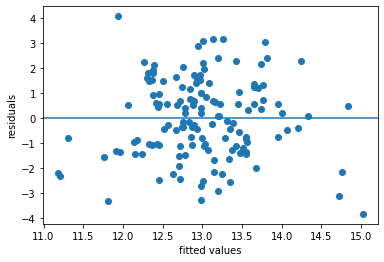

In [17]:
# Write your code here

plt.scatter(x = reg_mh_fit.fittedvalues , y = reg_mh_fit.resid)
plt.axhline(y = 0)
plt.xlabel('fitted values')
plt.ylabel('residuals')

## Task 4: Answering some questions about the regression model you have just fitted


Question 1: How is the accuracy of the regression model according to its r-squared value and residual plot?

Question 2: What is the intercept of the model? What does it mean?

Question 3: What are the coefficients and p-value of each independent variable? What do they mean?